In [1]:
import pandas as pd

In [3]:
melbourne_data = pd.read_csv(r"C:\Users\kr937\drive\2023\Kaggle\house price data\melb_data.csv")

In [6]:
melbourne_data.describe()
# std = 표준편차

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


### 모델링은 위한 데이터 고르기
당신의 데이터셋은 너무 많은 다양한 변수를 가지고 있어서 머리를 감쌀겁니다, 혹은 좋은 결과물을 내기위해. 우리는 어떻게 막대한 양의 데이터를 줄이고 이해하게 만들것인가요.

우리는 우리의 직관을 이용하여 몇가지 변수를 골라낼 것 입니다. 이후 과정에서 변수의 우선순위를 자동으로 지정하는 통계적 기술을 보여줄 것입니다.
We'll start by picking a few variables using our intuition. Later courses will show you statistical techniques to automatically prioritize variables.

변수 혹은 열을 고르기 위해서는 데이터셋의 모든 열의 목록을 볼 필요가 있을것 입니다. 데이터프레임의 열 속성을 사용합니다.
To choose variables/columns, we'll need to see a list of all columns in the dataset. That is done with the **columns** property of the DataFrame (the bottom line of code below).

In [1]:
import pandas as pd

melbourne_file_path = r'C:\Users\kr937\Desktop\drive\Kaggle\house price data\melb_data.csv'
melbourne_data = pd.read_csv(melbourne_file_path) 
melbourne_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [3]:
# 멜버른 데이터에는 결측값이 존재한다 (몇 개의 집의 변수가 기록되지 않음.)
# 우리는 이후 튜토리얼에서 결측값을 다루는법을 배울것입니다.  
# 당신이 다루는 Iowa데이터의 열에서는 결측값이 없습니다.
# 그래서 우리는 여기서 간단한 선택하여 멜버른 집값 데이터에서 몇개의 데이터를 드랍할것입니다.
# 코드가 아래에 있으니 걱정하지 마세요.

# dropna는 결측값을 지웁니다 (na가 결측값)
melbourne_data = melbourne_data.dropna(axis=0)

In [26]:
melbourne_data[['Price']]

,Price
1,1035000.0
2,1465000.0
4,1600000.0
6,1876000.0
7,1636000.0
...,...
12205,601000.0
12206,1050000.0
12207,385000.0
12209,560000.0


데이터의 부분집합을 선택하는데에는 여러가지 방법이 있습니다. 판다스 과정에서는 더 심도있게 들어가지만, 여기서는 두가지 접근법에 집중할 것 입니다.   
There are many ways to select a subset of your data. The Pandas course covers these in more depth, but we will focus on two approaches for now.

"예측 대상"을 선택하는 데에 점 표기법   
"특징"을 선택하는 데에 열 리스트로 선택   


Dot notation, which we use to select the "prediction target"   
Selecting with a column list, which we use to select the "features"

### Selecting The Prediction Target(예측대상 지정)
점 표기법으로 변수를 추출할 수 있습니다. 이 단일 열은 데이터의 열이 하나뿐인 데이터프레임과 같은 시리즈에 저장됩니다.   
You can pull out a variable with dot-notation. This single column is stored in a Series, which is broadly like a DataFrame with only a single column of data.

예측대상이라고 부르는 예측할 열을 선택에는 점 표기법을 사용한다. 보통 예측대상을 y라고한다.따라서 멜버른 데이터에 집값을 저장하는 데 필요한 코드는 다음과 같습니다.   
We'll use the dot notation to select the column we want to predict, which is called the prediction target. By convention, the prediction target is called y. So the code we need to save the house prices in the Melbourne data is

In [15]:
y = melbourne_data.Price

### Choosing "Features"(피처 고르기)

모델에 입력되고 나중에 예측을 만드는 데 사용되는 열을 "피처"이라고 합니다. 이 경우 주택 가격을 결정하는 데 사용되는 열입니다. 때로는 대상을 제외한 모든 열을 특징로 사용할 수 있습니다. 때로는 더 적은 수의 피처을 사용하는 것이 더 나을 수도 있습니다.   
The columns that are inputted into our model (and later used to make predictions) are called "features." In our case, those would be the columns used to determine the home price. Sometimes, you will use all columns except the target as features. Other times you'll be better off with fewer features.


지금은 몇개의 피처만 사용해서 모델링을 하지만 나중에는 다양한 피처를 사용한 모델을 반복하고 비교할것 입니다.   
For now, we'll build a model with only a few features. Later on you'll see how to iterate and compare models built with different features.

괄호 안에 열 이름 목록을 제공하여 여러 피쳐를 선택합니다. 해당 목록의 각 항목은 따옴표가 있는 문자열이어야 합니다.   
We select multiple features by providing a list of column names inside brackets. Each item in that list should be a string (with quotes).

Here is an example:

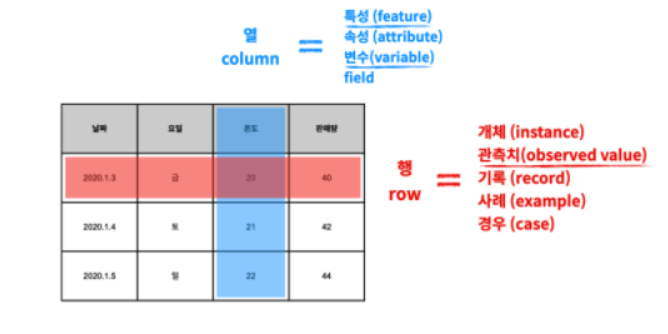

In [17]:
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']

By convention, this data is called X.

In [18]:
X = melbourne_data[melbourne_features]

집값을 예측하기 위해 describe와 head method를 사용하여 데이터 상단의 몇개의 열을 보자    
Let's quickly review the data we'll be using to predict house prices using the describe method and the head method, which shows the top few rows.

In [19]:
X.describe()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
count,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.576340,471.006940,-37.807904,144.990201
std,0.971079,0.711362,897.449881,0.075850,0.099165
min,1.000000,1.000000,0.000000,-38.164920,144.542370
25%,2.000000,1.000000,152.000000,-37.855438,144.926198
50%,3.000000,1.000000,373.000000,-37.802250,144.995800
75%,4.000000,2.000000,628.000000,-37.758200,145.052700
max,8.000000,8.000000,37000.000000,-37.457090,145.526350


In [20]:
X.head()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
1,2,1.0,156.0,-37.8079,144.9934
2,3,2.0,134.0,-37.8093,144.9944
4,4,1.0,120.0,-37.8072,144.9941
6,3,2.0,245.0,-37.8024,144.9993
7,2,1.0,256.0,-37.8060,144.9954


### Building Your Model
sk-learn 패키지를 이용해 모델링을 합니다. 이 라이브러리는 샘플에서도 볼 수 있듯이 sklearn이 사용된다. sklearn은 데이터프레임에서 모델링 할때 가장 쉽고 널리 사용되는 라이브러리입니다.
You will use the scikit-learn library to create your models. When coding, this library is written as sklearn, as you will see in the sample code. Scikit-learn is easily the most popular library for modeling the types of data typically stored in DataFrames.

모델을 사용하고 모델링하기 위한 단계:   
The steps to building and using a model are:

**Define**: What type of model will it be? A decision tree? Some other type of model? Some other parameters of the model type are specified too.   
            어떤 유형의 모델이 될까요? 의사 결정 트리? 다른 유형의 모델인가요? 모델 유형의 다른 매개변수도 지정할 수 있습니다.   
**Fit**: Capture patterns from provided data. This is the heart of modeling.   
        제공된 데이터에서 패턴을 캡처합니다. 이것이 모델링의 핵심입니다.
**Predict**: Just what it sounds like   
            말 그래도
**Evaluate**: Determine how accurate the model's predictions are.   
            모델 예측의 정확성 확인
Here is an example of defining a decision tree model with scikit-learn and fitting it with the features and target variable.     
다음은 scikit-learn을 사용하여 의사결정 트리 모델을 정의하고 형상 및 대상 변수와 일치시키는 예입니다.

In [21]:
from sklearn.tree import DecisionTreeRegressor

# Define model. Specify a number for random_state to ensure same results each run
melbourne_model = DecisionTreeRegressor(random_state=1)

# Fit model
melbourne_model.fit(X, y)

DecisionTreeRegressor(random_state=1)

많은 머신러닝 모델들은 모델학습에서 임의성을 따른다.random_state에 숫자를 지정하면 각 런에서 동일한 결과를 얻을 수 있다. 이는 좋은 관행으로 이어진다. 어떤 숫자를 사용하든 모델 품질은 정확히 어떤 값을 선택하느냐에 따라 의미 있게 달라지지 않습니다.    
Many machine learning models allow some randomness in model training. Specifying a number for random_state ensures you get the same results in each run. This is considered a good practice. You use any number, and model quality won't depend meaningfully on exactly what value you choose.   

이제 예측에 사용할 수 있는 적합한 모형이 있습니다.   
We now have a fitted model that we can use to make predictions.

실제로는 이미 가격이 책정된 주택이 아니라 시장에 새로 출시되는 주택에 대해 예측을 하고 싶을 것입니다. 하지만 예측 함수가 어떻게 작동하는지 확인하기 위해 학습 데이터의 처음 몇 행에 대해 예측을 해보겠습니다.    
In practice, you'll want to make predictions for new houses coming on the market rather than the houses we already have prices for. But we'll make predictions for the first few rows of the training data to see how the predict function works.

In [23]:
print("다음 5개 주택에 대한 예측:")
print(X.head())
print("예측값")
print(melbourne_model.predict(X.head()))

다음 5개 주택에 대한 예측:
   Rooms  Bathroom  Landsize  Lattitude  Longtitude
1      2       1.0     156.0   -37.8079    144.9934
2      3       2.0     134.0   -37.8093    144.9944
4      4       1.0     120.0   -37.8072    144.9941
6      3       2.0     245.0   -37.8024    144.9993
7      2       1.0     256.0   -37.8060    144.9954
예측값
[1035000. 1465000. 1600000. 1876000. 1636000.]


In [27]:
melbourne_data[['Price']]

,Price
1,1035000.0
2,1465000.0
4,1600000.0
6,1876000.0
7,1636000.0
...,...
12205,601000.0
12206,1050000.0
12207,385000.0
12209,560000.0
